In [1]:
#!/bin/python3

#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
regions = {
    'lab': {
        'lon' : (-55, -51),
        'lat' : (56, 59),
        'name' : 'Labrador Sea'
    },
    'irm': {
        'lon' : (-39, -35),
        'lat' : (58, 61),
        'name' : 'Irminger Sea'
    },
    'gul': {
        'lon' : (-57, -53),
        'lat' : (34, 38),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-20, -16),
        'lat' : (50, 53),
        'name' : 'North East Sea'
    }
}

reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [9]:
## Function to crop the dataset

def Crops(coord, d_set, dictionary):
    lon1, lon2 = dictionary[coord]['lon']
    lat1, lat2 = dictionary[coord]['lat']
    name_fig = dictionary[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))


In [4]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'

fl_n1 = 'ARMOR_*.nc'
fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
c_isas = xr.open_dataset(dir_2 + fl_n2, autoclose=True)


/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  import sys
/venv/py3-phyocean/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,
/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The autoclose argument is 

In [5]:
c_isas.MLDP

<xarray.DataArray 'MLDP' (time: 120, depth: 1, latitude: 545, longitude: 720)>
[47088000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude   (latitude) float32 -77.010475 -76.89761 ... 89.69298 89.89626
  * depth      (depth) float32 1.0
  * time       (time) datetime64[ns] 2006-01-15 2006-02-15 ... 2015-12-15
Attributes:
    long_name:      Mixed layer depth
    standard_name:  
    units:          meter
    valid_min:      0.0
    valid_max:      5000.0

[]

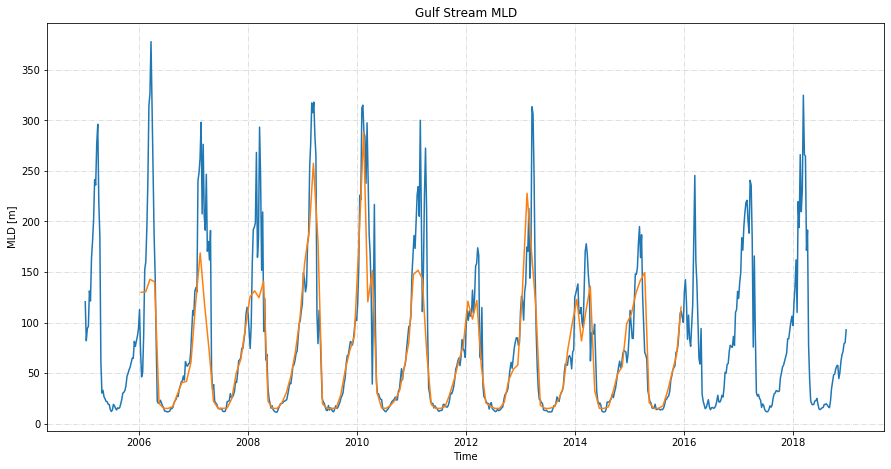

In [10]:
gulf_a = Crops('gul', c_armor, regions)
gulf_i = Crops('gul', c_isas, regions)

mean_a = gulf_a.mean(dim=('longitude', 'latitude'))
mean_i = gulf_i.mean(dim=('longitude', 'latitude'))

ma = mean_a.mlotst
mi = mean_i.MLDP[:,0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 7.5))
ax.plot(mean_a.time.values, ma)
ax.plot(mean_i.time.values, mi)

plt.xlabel('Time')
plt.ylabel('MLD [m]')
plt.title('Gulf Stream MLD')
plt.grid(alpha=0.5, linestyle='-.')
plt.plot()
#plt.savefig(name_fig, bbox_inches='tight')

[]

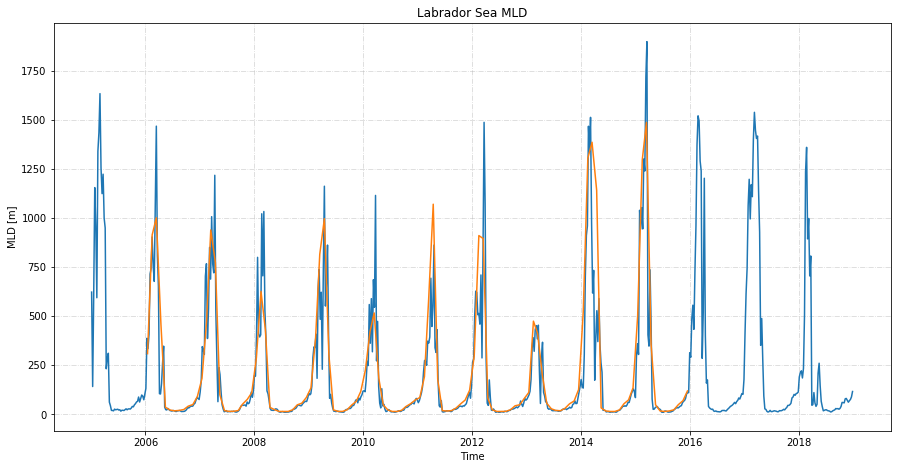

In [11]:
labr_a = Crops('lab', c_armor, regions)
labr_i = Crops('lab', c_isas, regions)

mean_a = labr_a.mean(dim=('longitude', 'latitude'))
mean_i = labr_i.mean(dim=('longitude', 'latitude'))

ma = mean_a.mlotst
mi = mean_i.MLDP[:,0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 7.5))
ax.plot(mean_a.time.values, ma)
ax.plot(mean_i.time.values, mi)

plt.xlabel('Time')
plt.ylabel('MLD [m]')
plt.title('Labrador Sea MLD')
plt.grid(alpha=0.5, linestyle='-.')
plt.plot()
#plt.savefig(name_fig, bbox_inches='tight')

[]

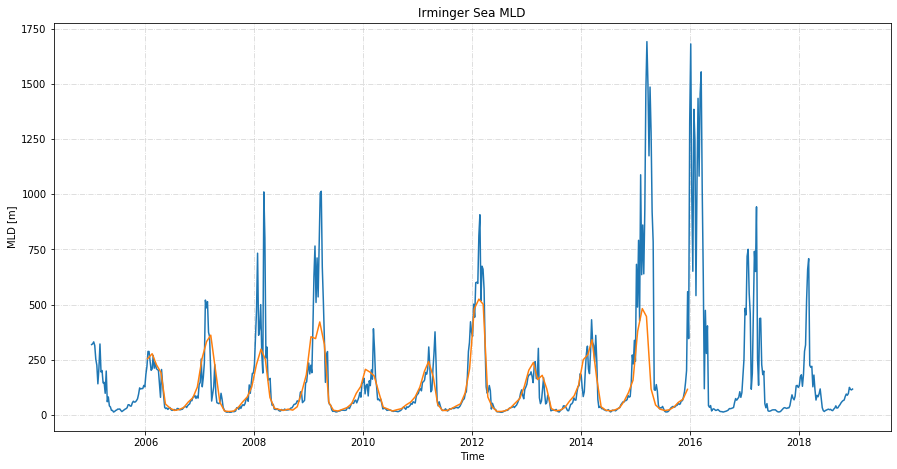

In [12]:
irmi_a = Crops('irm', c_armor, regions)
irmi_i = Crops('irm', c_isas, regions)

mean_a = irmi_a.mean(dim=('longitude', 'latitude'))
mean_i = irmi_i.mean(dim=('longitude', 'latitude'))

ma = mean_a.mlotst
mi = mean_i.MLDP[:,0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 7.5))
ax.plot(mean_a.time.values, ma)
ax.plot(mean_i.time.values, mi)

plt.xlabel('Time')
plt.ylabel('MLD [m]')
plt.title('Irminger Sea MLD')
plt.grid(alpha=0.5, linestyle='-.')
plt.plot()
#plt.savefig(name_fig, bbox_inches='tight')

[]

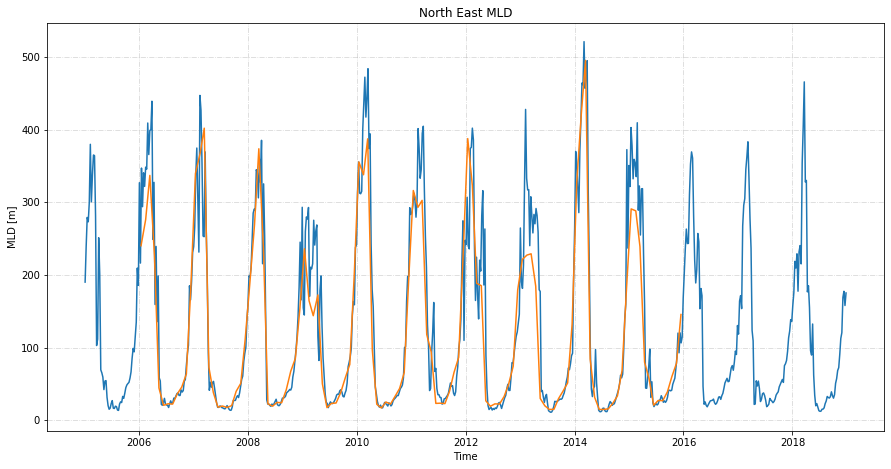

In [13]:
nort_a = Crops('noe', c_armor, regions)
nort_i = Crops('noe', c_isas, regions)

mean_a = nort_a.mean(dim=('longitude', 'latitude'))
mean_i = nort_i.mean(dim=('longitude', 'latitude'))

ma = mean_a.mlotst
mi = mean_i.MLDP[:,0]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 7.5))
ax.plot(mean_a.time.values, ma)
ax.plot(mean_i.time.values, mi)

plt.xlabel('Time')
plt.ylabel('MLD [m]')
plt.title('North East MLD')
plt.grid(alpha=0.5, linestyle='-.')
plt.plot()
#plt.savefig(name_fig, bbox_inches='tight')